# GEOL 2001: Solar Radiation Lab

#### Written by Abby Eckland, October 2020
#### Questions? Contact: abigail.eckland@colorado.edu

### Learning Goals:
- Become familiar with terms: zenith angle, solar flux, radiation, energy, and power
- Draft an excel workbooks from scratch to model a natural phenomenon that varies is space and time. 
- Devise excel formulas to be able to calculate solar flux on variations of Earth’s tilts, latitude and time of day for the following days (a) winter solstice, (b) summer solstice, and (c) Fall/Spring equinox. 
- Compare and contrasts the time of year, time of day, and the latitude for impacts on the amount of solar insolation a location will receive (hint: will need this later for discussing glacier growth and melt). 
- ***New:*** *Evaluate and apply lessons learned to calculate solar flux using Python Code in Jupyter Notebooks*

### Skills
- Dimensional analysis
- Working with data
- Unit conversions
- Figure making in excel
- ***New:*** *Reading in and using data using Python in Jupyter Notebooks*
- ***New:*** *Data visualization in Jupyer Notebooks*

## Part 1: Modeling the Solar Flux by Latitude
We want to model the solar flux at various latitudes on earth. To do this, we will use Python in a Jupyter Notebook and the following constants and information.

Constants:
- Solar constant = 1370 W/m$^2$
- Axial Tilt = 23.45${^\circ}$

When the sun's radiation hits a surface at an angle, such as the surface of the earth, the angle between incoming radiation that is perpendicular to the surface is called the **zenith angle, Z**. 

![Zenith Angle Concept](data/zenith_angle.png)

You can use the following equations to calculate the midday (noon) solar flux at any zenith angle **(Eq. 1)**:

$$q(Z) = S*cos(Z)$$ 

where q is the insolation, Z is the zenith angle, and S is the solar constant. *Remember, the angle of the earth's tilt relative to the ecliptic will vary based on time of year. In summer in the northern hemisphere, the earth is tilted toward the sun by $23.45{^\circ}$. In winter in the northern hemisphere, the earth is tilted away from the sun by $23.45{^\circ}$.* At the equinox it is neither tilted toward nor away from the sun. 

![Earth's Annual Rotation](data/earth_annual_rotation.png)
![Earth's tilt](data/axial_tilt.png)

#### **Step 1**
Write code to model the insolation, or solar flux, at latitudes every $10{^\circ}$ between $-90{^\circ}$ and $90{^\circ} N$. To start, we will just consider the solar flux at local noon - when the sun is highest in the sky. 

Create an array called "Latitude" of latitude values between $-90{^\circ}$ and $90{^\circ} N$. We will build a pandas dataframe, a data structure similar to a table or chart in excel, to make calculations and view the results.

In [1]:
# Import packages
import pandas as pd
import numpy as np

In [2]:
# Create pandas dataframe
Q_summer = pd.DataFrame()

In [3]:
# Create column called "Latitude" and fill with values from -90 to 90.
Q_summer['Latitude (N)'] = np.arange(-90, 100, 10)

In [4]:
# Preview the dataframe
Q_summer

,Latitude (N)
0,-90
1,-80
2,-70
3,-60
4,-50
5,-40
6,-30
7,-20
8,-10
9,0


#### **Step 2**

Use Python to calculate insolation at noon on both equinoxes (spring and fall) and both solstices (summer and winter). 

Hint: break calculations and equations down into smaller steps and go column by column to get the insolation for each of these times of the year at all latitudes. You will need to repeat your calculations for summer solstice, winter solstice, and the equinoxes. 

This notebook will show you how to calculate the insolation during the summer solstice.

In [5]:
Q_summer['Axial Tilt (deg)'] = 23.45
Q_summer.head()

,Latitude (N),Axial Tilt (deg)
0,-90,23.45
1,-80,23.45
2,-70,23.45
3,-60,23.45
4,-50,23.45


In [6]:
Q_summer['Zenith Angle (deg)'] = Q_summer['Latitude (N)'] - Q_summer['Axial Tilt (deg)']

In [7]:
Q_summer['Zenith Angle (rad)'] = np.radians(Q_summer['Zenith Angle (deg)'])

In [8]:
Q_summer['Solar Constant (W/m^2)'] = 1370

In [9]:
Q_summer['q Summer (W/m^2)'] = np.cos(Q_summer['Zenith Angle (rad)']) * Q_summer['Solar Constant (W/m^2)']
Q_summer['q Summer (W/m^2)'] = [0 if i < 0 else i for i in Q_summer['q Summer (W/m^2)']]
Q_summer

,Latitude (N),Axial Tilt (deg),Zenith Angle (deg),Zenith Angle (rad),Solar Constant (W/m^2),q Summer (W/m^2)
0,-90,23.45,-113.45,-1.980076,1370,0.000000
1,-80,23.45,-103.45,-1.805543,1370,0.000000
2,-70,23.45,-93.45,-1.631010,1370,0.000000
3,-60,23.45,-83.45,-1.456477,1370,156.276209
4,-50,23.45,-73.45,-1.281944,1370,390.247191
5,-40,23.45,-63.45,-1.107411,1370,612.360710
6,-30,23.45,-53.45,-0.932878,1370,815.867959
7,-20,23.45,-43.45,-0.758346,1370,994.585472
8,-10,23.45,-33.45,-0.583813,1370,1143.083010
9,0,23.45,-23.45,-0.409280,1370,1256.848548


Let's consolidate the above lines of code to calculate the insolation during the Winter Solstice and the Spring and Fall Equinoxes. ***Remember that you will need to account for how the zenith angle will change in the different seasons!*** For example, in the winter, the zenith angle will be the latitude + axial tilt (in the summer, this was latitude - axial tilt). In the winter, the earth is tilted further away from the sun in the northern hemisphere. 

In [10]:
Q_winter = pd.DataFrame()
Q_winter['Latitude (N)'] = np.arange(-90, 100, 10)
Q_winter['Axial Tilt (deg)'] = 23.45
Q_winter['Zenith Angle (deg)'] = Q_winter['Latitude (N)'] + Q_winter['Axial Tilt (deg)']
Q_winter['Zenith Angle (rad)'] = np.radians(Q_winter['Zenith Angle (deg)'])
Q_winter['Solar Constant (W/m^2)'] = 1370
Q_winter['q Winter (W/m^2)'] = np.cos(Q_winter['Zenith Angle (rad)']) * Q_winter['Solar Constant (W/m^2)']
Q_winter['q Winter (W/m^2)'] = [0 if i < 0 else i for i in Q_winter['q Winter (W/m^2)']]
Q_winter

,Latitude (N),Axial Tilt (deg),Zenith Angle (deg),Zenith Angle (rad),Solar Constant (W/m^2),q Winter (W/m^2)
0,-90,23.45,-66.55,-1.161517,1370,545.189625
1,-80,23.45,-56.55,-0.986984,1370,755.156429
2,-70,23.45,-46.55,-0.812451,1370,942.178188
3,-60,23.45,-36.55,-0.637918,1370,1100.572339
4,-50,23.45,-26.55,-0.463385,1370,1225.526157
5,-40,23.45,-16.55,-0.288852,1370,1313.242982
6,-30,23.45,-6.55,-0.114319,1370,1361.057584
7,-20,23.45,3.45,0.060214,1370,1367.517140
8,-10,23.45,13.45,0.234747,1370,1332.425379
9,0,23.45,23.45,0.409280,1370,1256.848548


In [11]:
Q_fall = pd.DataFrame()
Q_fall['Latitude (N)'] = np.arange(-90, 100, 10)
Q_fall['Axial Tilt (deg)'] = 23.45
Q_fall['Zenith Angle (deg)'] = Q_fall['Latitude (N)']
Q_fall['Zenith Angle (rad)'] = np.radians(Q_fall['Zenith Angle (deg)'])
Q_fall['Solar Constant (W/m^2)'] = 1370
Q_fall['q Fall (W/m^2)'] = np.cos(Q_fall['Zenith Angle (rad)']) * Q_fall['Solar Constant (W/m^2)']
Q_fall['q Fall (W/m^2)'] = [0 if i < 0 else i for i in Q_fall['q Fall (W/m^2)']]
Q_fall

,Latitude (N),Axial Tilt (deg),Zenith Angle (deg),Zenith Angle (rad),Solar Constant (W/m^2),q Fall (W/m^2)
0,-90,23.45,-90,-1.570796,1370,8.388831e-14
1,-80,23.45,-80,-1.396263,1370,2.378980e+02
2,-70,23.45,-70,-1.221730,1370,4.685676e+02
3,-60,23.45,-60,-1.047198,1370,6.850000e+02
4,-50,23.45,-50,-0.872665,1370,8.806190e+02
5,-40,23.45,-40,-0.698132,1370,1.049481e+03
6,-30,23.45,-30,-0.523599,1370,1.186455e+03
7,-20,23.45,-20,-0.349066,1370,1.287379e+03
8,-10,23.45,-10,-0.174533,1370,1.349187e+03
9,0,23.45,0,0.000000,1370,1.370000e+03


In [12]:
Q_spring = pd.DataFrame()
Q_spring['Latitude (N)'] = np.arange(-90, 100, 10)
Q_spring['Axial Tilt (deg)'] = 23.45
Q_spring['Zenith Angle (deg)'] = Q_spring['Latitude (N)']
Q_spring['Zenith Angle (rad)'] = np.radians(Q_spring['Zenith Angle (deg)'])
Q_spring['Solar Constant (W/m^2)'] = 1370
Q_spring['q Spring (W/m^2)'] = np.cos(Q_spring['Zenith Angle (rad)']) * Q_spring['Solar Constant (W/m^2)']
Q_spring['q Spring (W/m^2)'] = [0 if i < 0 else i for i in Q_spring['q Spring (W/m^2)']]
Q_spring

,Latitude (N),Axial Tilt (deg),Zenith Angle (deg),Zenith Angle (rad),Solar Constant (W/m^2),q Spring (W/m^2)
0,-90,23.45,-90,-1.570796,1370,8.388831e-14
1,-80,23.45,-80,-1.396263,1370,2.378980e+02
2,-70,23.45,-70,-1.221730,1370,4.685676e+02
3,-60,23.45,-60,-1.047198,1370,6.850000e+02
4,-50,23.45,-50,-0.872665,1370,8.806190e+02
5,-40,23.45,-40,-0.698132,1370,1.049481e+03
6,-30,23.45,-30,-0.523599,1370,1.186455e+03
7,-20,23.45,-20,-0.349066,1370,1.287379e+03
8,-10,23.45,-10,-0.174533,1370,1.349187e+03
9,0,23.45,0,0.000000,1370,1.370000e+03


### STOP:

What do you notice about the insolation for the fall and spring equinoxes? Write your observation in one sentence in the cell below.

#### Your answer goes here:

#### Step 3

Plot all your solar insolation data for each of the four times of year as a function of latitute. All four should be on ***one*** plot.

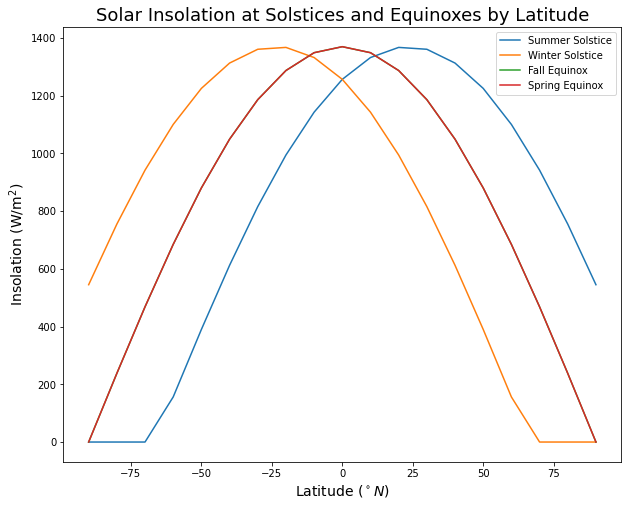

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,8))
plt.plot(Q_summer['Latitude (N)'], Q_summer['q Summer (W/m^2)'], label = 'Summer Solstice')
plt.plot(Q_winter['Latitude (N)'], Q_winter['q Winter (W/m^2)'], label = 'Winter Solstice')
plt.plot(Q_fall['Latitude (N)'], Q_fall['q Fall (W/m^2)'], label = 'Fall Equinox')
plt.plot(Q_spring['Latitude (N)'], Q_spring['q Spring (W/m^2)'], label = 'Spring Equinox')
plt.legend()
plt.title('Solar Insolation at Solstices and Equinoxes by Latitude', size = 18)
plt.xlabel('Latitude ($^\circ N$)', size = 14)
plt.ylabel('Insolation (W/m$^2$)', size = 14)
plt.show()

### STOP: 

Was the observation that you made above confirmed by the plot? Why or why not?

#### Your answer goes here:

## Part 2: Modeling the Solar Flux Throughout the Day

Recall that the equation for insolation is shown below. 

$$q(Z) = S * cos(Z)$$

At midday, you can simply use the latitude and the axial tilt to calculate the zenith angle. However, to get insolation at any hour of the day, you must use the following equation **(Eq. 2)**: 

$$cos(Z) = sin(\phi)sin(\delta) + cos(\phi)cos(\delta)cos(h)$$ 

where $\phi$ is axial tilt, $\delta$ is the latitude in degrees, and h is the hour angle.

The **hour angle** is a measure of the angle the sun is hitting the surface of the earth relative to that at noon. At night, the insolation is zero because the sun is below the horizon. At noon, the hour angle is zero. At any time, other than noon, the hour angle is measured as +/- degrees from noon. There are 360$^circ$ in a circle and 24 hours in a day, so to calculate the hour angle, you can use the following formula **(Eq. 3)**:

$$h = 15^\circ / \mbox{ hour} * (\mbox{hours before or after noon})$$

If before noon, the hour angle should be negative. In after noon, the hour angle should be positive. 

Let's see an example:

In [14]:
# 10:30 am local time in hour angle is -22.5 degrees

hours = 12-10.5 
print(hours, 'hours')
h = 15*(-hours) # negative since 10:30 is in the AM
print(h, 'degrees')

1.5 hours
-22.5 degrees


#### **Step 1**

Using the equations, skills, and knowledge from Part 1, in addition to the new equations above (Eqs. 2 and 3), model the solar insolation at one latitude over a 24-hour period on each solstice and each equinox. For your latitude, please use the latitude of Boulder (40$^\circ$ N).

It will be helpful to follow the steps and set-up for Part 1 again, only this time your x variable is not latitude (think about what it would be instead). 

Create arrays called "hour" and "hour angle" while setting up a new pandas dataframe.

In [15]:
Q_summer_40 = pd.DataFrame()
Q_summer_40['Hour'] = np.arange(0, 25, 1)
Q_summer_40['Hour Angle'] = np.arange(-180, 195, 15)
Q_summer_40.head(13)

,Hour,Hour Angle
0,0,-180
1,1,-165
2,2,-150
3,3,-135
4,4,-120
5,5,-105
6,6,-90
7,7,-75
8,8,-60
9,9,-45


#### **Step 2**

Let's calculate cos(Z) using Eq. 2, creating new columns along the way.

In [20]:
latitude = 40
tilt = np.radians(23.45)
latitude_rads = np.radians(latitude)
Q_summer_40['Hour Angle (rad)'] = np.radians(Q_summer_40['Hour Angle'])
Q_summer_40['Cos(Z)'] = (np.sin(tilt) * np.sin(latitude_rads)) + (np.cos(tilt) * np.cos(latitude_rads) * np.cos(Q_summer_40['Hour Angle (rad)']))
Q_summer_40.head()

,Hour,Hour Angle,Hour Angle (rad),Cos(Z)
0,0,-180,-3.141593,-0.446979
1,1,-165,-2.879793,-0.423032
2,2,-150,-2.617994,-0.352825
3,3,-135,-2.356194,-0.241141
4,4,-120,-2.094395,-0.095591


#### **Step 3**

Now we can calculate solar insolation using Eq. 1 using the same method as in Part 1.

In [23]:
S = 1370
Q_summer_40['q Summer (W/m^2)'] = S * Q_summer_40['Cos(Z)']
Q_summer_40['q Summer (W/m^2)'] = [0 if i < 0 else i for i in Q_summer_40['q Summer (W/m^2)']]
Q_summer_40

,Hour,Hour Angle,Hour Angle (rad),Cos(Z),q Summer (W/m^2)
0,0,-180,-3.141593,-0.446979,0.000000
1,1,-165,-2.879793,-0.423032,0.000000
2,2,-150,-2.617994,-0.352825,0.000000
3,3,-135,-2.356194,-0.241141,0.000000
4,4,-120,-2.094395,-0.095591,0.000000
5,5,-105,-1.832596,0.073905,101.249681
6,6,-90,-1.570796,0.255796,350.441136
7,7,-75,-1.308997,0.437688,599.632590
8,8,-60,-1.047198,0.607184,831.842059
9,9,-45,-0.785398,0.752733,1031.244850


#### **Step 4**

Repeat the steps above to calculate the insolation over a day on the remaining solstice and equinoxes.

Let's calculate the insolation over the day during the winter solstice, then the equinoxes.

In [27]:
Q_winter_40 = pd.DataFrame()
Q_winter_40['Hour'] = np.arange(0, 25, 1)
Q_winter_40['Hour Angle'] = np.arange(-180, 195, 15)
Q_winter_40['Hour Angle (rad)'] = np.radians(Q_winter_40['Hour Angle'])
Q_winter_40['Cos(Z)'] = (np.sin(-tilt) * np.sin(latitude_rads)) + (np.cos(-tilt) * np.cos(latitude_rads) * np.cos(Q_winter_40['Hour Angle (rad)']))
Q_winter_40['q Winter (W/m^2)'] = S * Q_winter_40['Cos(Z)']
Q_winter_40['q Winter (W/m^2)'] = [0 if i < 0 else i for i in Q_winter_40['q Winter (W/m^2)']]
Q_winter_40

,Hour,Hour Angle,Hour Angle (rad),Cos(Z),q Winter (W/m^2)
0,0,-180,-3.141593,-0.958572,0.000000
1,1,-165,-2.879793,-0.934625,0.000000
2,2,-150,-2.617994,-0.864418,0.000000
3,3,-135,-2.356194,-0.752733,0.000000
4,4,-120,-2.094395,-0.607184,0.000000
5,5,-105,-1.832596,-0.437688,0.000000
6,6,-90,-1.570796,-0.255796,0.000000
7,7,-75,-1.308997,-0.073905,0.000000
8,8,-60,-1.047198,0.095591,130.959787
9,9,-45,-0.785398,0.241141,330.362579


## STOP:

What variable needed to change between the summer and winter solstice insolation calculation? Stated in other words, what controls the insolation at a specific latitude, i.e., between summer and winter months? Hint: see line 5 in the code cell above.

#### Your answer goes here:

Now for the equinoxes.

In [29]:
Q_fall_40 = pd.DataFrame()
Q_fall_40['Hour'] = np.arange(0, 25, 1)
Q_fall_40['Hour Angle'] = np.arange(-180, 195, 15)
Q_fall_40['Hour Angle (rad)'] = np.radians(Q_fall_40['Hour Angle'])
Q_fall_40['Cos(Z)'] = (np.sin(0) * np.sin(latitude_rads)) + (np.cos(0) * np.cos(latitude_rads) * np.cos(Q_fall_40['Hour Angle (rad)']))
Q_fall_40['q Fall (W/m^2)'] = S * Q_fall_40['Cos(Z)']
Q_fall_40['q Fall (W/m^2)'] = [0 if i < 0 else i for i in Q_fall_40['q Fall (W/m^2)']]
Q_fall_40

,Hour,Hour Angle,Hour Angle (rad),Cos(Z),q Fall (W/m^2)
0,0,-180,-3.141593,-7.660444e-01,0.000000e+00
1,1,-165,-2.879793,-7.399421e-01,0.000000e+00
2,2,-150,-2.617994,-6.634139e-01,0.000000e+00
3,3,-135,-2.356194,-5.416752e-01,0.000000e+00
4,4,-120,-2.094395,-3.830222e-01,0.000000e+00
5,5,-105,-1.832596,-1.982669e-01,0.000000e+00
6,6,-90,-1.570796,4.690669e-17,6.426217e-14
7,7,-75,-1.308997,1.982669e-01,2.716256e+02
8,8,-60,-1.047198,3.830222e-01,5.247404e+02
9,9,-45,-0.785398,5.416752e-01,7.420951e+02


## STOP: 

Why was the tilt **zero** for the Fall equinox insolation calculation above for Boulder? Do we need to repeat the steps above for the Spring Equinox?

#### Your answer goes here:

Turns out, we do not need to complete the same steps as above for the Spring equinox, since solar insolation will again be controlled by an axial tilt of zero (same as for the Fall equinox).

#### **Step 5**

Finally, let's plot the insolation at Boulder, CO (40$^\circ$ N) during the solstices and equinoxes. Please plot each dataset on ***one*** plot.

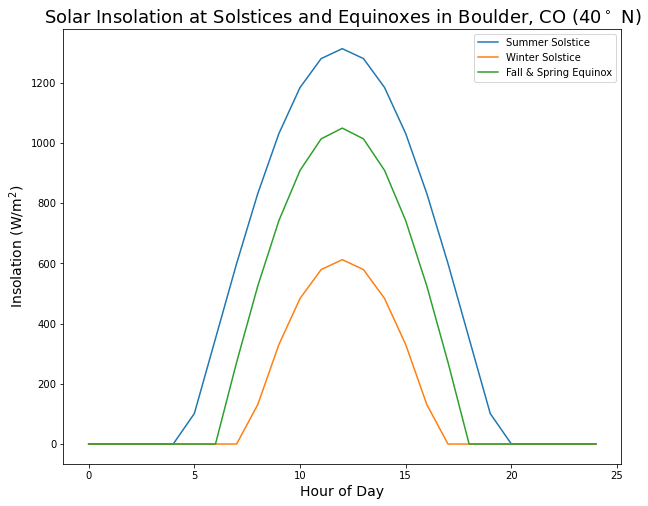

In [33]:
fig, ax = plt.subplots(figsize = (10,8))
plt.plot(Q_summer_40['Hour'], Q_summer_40['q Summer (W/m^2)'], label = 'Summer Solstice')
plt.plot(Q_winter_40['Hour'], Q_winter_40['q Winter (W/m^2)'], label = 'Winter Solstice')
plt.plot(Q_fall_40['Hour'], Q_fall_40['q Fall (W/m^2)'], label = 'Fall & Spring Equinox')
plt.legend()
plt.title('Solar Insolation at Solstices and Equinoxes in Boulder, CO (40$^\circ$ N)', size = 18)
plt.xlabel('Hour of Day', size = 14)
plt.ylabel('Insolation (W/m$^2$)', size = 14)
plt.show()

#### **Step 6**

One unit used when determining if a building could benefit from solar panels is called “peak sun hours”. 

One peak sun hour = 1000 W/m$^2$ of sunlight. However, when calculating the total amount of peak sun hours received at any location, you don’t just consider hours with 1000 W/$m^2$ of solar radiation. Instead, you need to sum the **total amount of solar insolation** received by the location. You then express that in terms of the equivalent number of hours with 1000 W/m2.  

Calculate the sun peak hour values for Boulder, CO.

In [40]:
Peak_Sun_Hours = pd.DataFrame()
Peak_Sun_Hours['Season'] = ['Summer', 'Fall', 'Winter', 'Spring']
Peak_Sun_Hours['Cumulative Q (W/m^2)'] = (Q_summer_40['q Summer (W/m^2)'].sum(), Q_fall_40['q Fall (W/m^2)'].sum(), Q_winter_40['q Winter (W/m^2)'].sum(), Q_fall_40['q Fall (W/m^2)'].sum())
Peak_Sun_Hours['Cumulative Q (kWh)'] = Peak_Sun_Hours['Cumulative Q (W/m^2)']/1000
Peak_Sun_Hours

,Season,Cumulative Q (W/m^2),Cumulative Q (kWh)
0,Summer,12071.440211,12.071440
1,Fall,7971.598764,7.971599
2,Winter,3660.852951,3.660853
3,Spring,7971.598764,7.971599


The sun peak hour values for Boulder are 12, 8, and 4 kWh for summer, fall/spring, and winter, respectively.

## STOP: 

List and briefly describe three factors that might impact how much actual solar powered electricity someone gets. Think about the incoming radiation, the panels themselves, and any other things that might impact net electricity production.

E.g., Snow Cover - in winter these may be even more covered. (Especially for Boulder, CO).

#### Your answer goes here:

## Part 3: Modeling the Solar Flux for Different Tilts